In [1]:
# Load the needed modules

import numpy as np
import dicom as dc
from glob import glob
import os
import matplotlib.pyplot as plt

from functions import listdir_nohidden
from functions import load_scan
from functions import get_pixels_hu
from functions import sample_stack
from functions import resample

In [3]:
# First load the scans

data_path = "15mGy\\"

img_path_list = [data_path]

output_path = "output\\"

g = glob("15mGy\\*") # Escaping of characters...
print "Total of %d DICOM images. \nFirst 5 filesnames:" % len(g)
print "\n".join(g[:5])

Total of 89 DICOM images. 
First 5 filesnames:
15mGy\EE0171D5
15mGy\EE03984F
15mGy\EE07C050
15mGy\EE08F2BF
15mGy\EE0CC934


In [4]:
scan_set = (load_scan(data_path))
imgs = get_pixels_hu(scan_set)
np.save(output_path + "fullimages_D%d.npy" % (4), imgs)

IndexError: index 91 is out of bounds for axis 0 with size 89

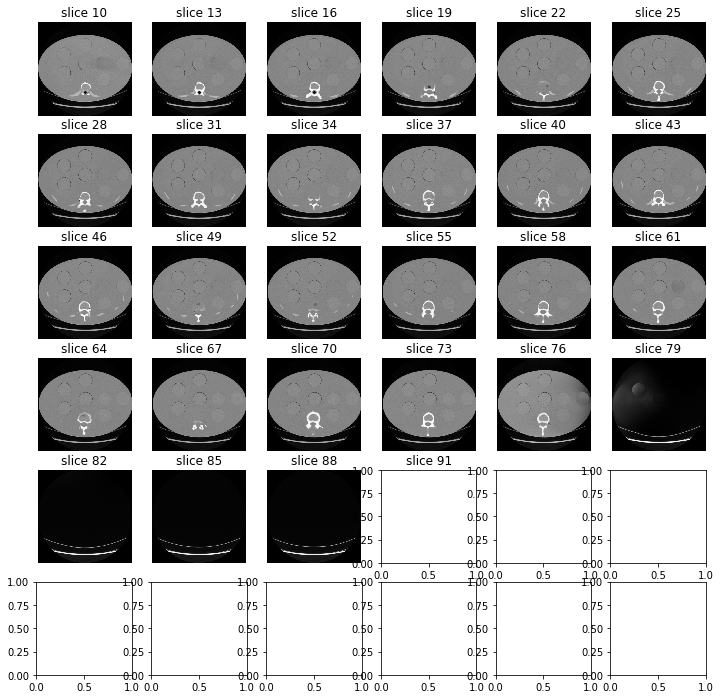

In [5]:
sample_stack(imgs)

(89L, 512L, 512L)
-1024


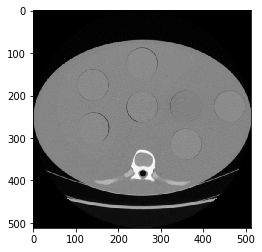

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(imgs[13,:,:], 'gray')

print imgs.shape
print np.min(imgs)


# Overlay-design

Ok, now we have a test-set. It should be possible to define a mask that marks "trunk" of the phantom - this mask can be
fitted to a simple segmentation of the phantom data-set. The overlay then can be defined according to the trunk-mask

Best would be a mathematical description of the phantom. It looks aaalmost like an ellipse.
Need:

    1 Short axis of main trunk part
    2 Long axis of main trunk part
    3 Coordinates of seven inserts
    4 Small-radius of the insert
    5 Large-radius of the insert
    6 Coordinates of the main trunk


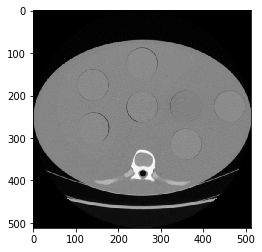

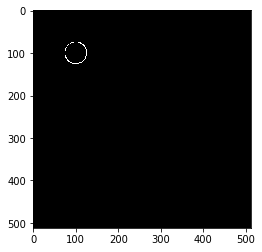

In [40]:
img = imgs[13,:,:]
lx, ly = img.shape
X, Y = np.ogrid[0:lx, 0:ly]

outer_rim = (X - 100)**2 + (Y - 100)**2 < 700
inner_rim = (X - 100)**2 + (Y - 100)**2 < 600

mask = np.zeros(img.shape)

mask[outer_rim] = 1
mask[inner_rim] = 0

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.imshow(img, 'gray')

fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.imshow(mask, 'gray')

plt.savefig("test.png")